# Titanic Competition - Kaggle

## Train Data Set



## Introduction

This project involves predicting the survival of passengers aboard the Titanic based on passenger data such as age, gender, class, and ticket fare. Using the Kaggle Titanic dataset, I applied various data preprocessing, exploratory data analysis (EDA), and machine learning techniques to create models that predict survival outcomes. The project demonstrates my skills in feature engineering, handling imbalanced datasets, and evaluating classification models.

#### Objective: 
**To predict survival on the Titanic using passenger data**

#### Dataset Description:

#### Key Features:

- Pclass: Passenger class (1st, 2nd, 3rd)
- Sex: Gender
- Title:
- Age: Age of the passenger
- Fare: Ticket fare
- Embarked: Port of Embarkation (C, Q, S)
- Target Variable: Survived (0 = Not Survived, 1 = Survived).

#### Key highlights:

- Performed EDA to uncover insights and relationships between features.
- Addressed class imbalance using techniques like SMOTE and random oversampling.
- Built and evaluated machine learning models, including Logistic Regression, Random Forest, and XGBoost.
- Achieved model performance analysis using accuracy, precision, recall, and F1-score metrics.
- Explore the repository to learn about my approach to solving this classic data science challenge!
  


## Data Loading and Preprocessing

In [2]:
#import libraries
import pandas as pd
import numpy as np

In [3]:
#loading data
dftraining = pd.read_csv(r"C:\Users\Pulani\OneDrive\Desktop\Kaggle\Titanic data set\Titanic\train.csv")
print ("Data loaded successfully!")

# Display the first few rows of the dataset
dftraining.head()

Data loaded successfully!


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Initial Data Analysis (First Part of EDA)

In [5]:
# Check the number of rows and columns
dftraining.shape

(891, 12)

In [6]:
# Check the data types and missing values
dftraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Column names
dftraining.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
#Survived Value counts
dftraining["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

**Traget Variable "Survived" is not balanced.**
- 0 (Did not survive): 549 passengers
- 1 (Survived): 342 passengers
- This kind of imbalance can be important to consider when building the model, as some algorithms may be biased toward the majority class.

In [10]:
# Check for duplicate values in each column
dftraining.duplicated().sum()

0

In [11]:
# Summary statistics for numerical columns
dftraining.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# Check for missing values
missing_values = dftraining.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Data Cleaning & Transforming


### Handling missing values in Age column

- I'm going to impute age coloumn with median age


In [15]:
# Check the number of missing values in the 'age' column
missing_age_count = dftraining['Age'].isnull().sum()
print(f"Missing values in 'Age': {missing_age_count}")

# Calculate the median age
median_age = dftraining['Age'].median()
print(f"Median age: {median_age}")

# Fill missing values with the median
dftraining['Age'] = dftraining['Age'].fillna(median_age)

# Confirm there are no missing values
print(dftraining['Age'].isnull().sum())

#Veryfy the changes

# Display summary statistics for the 'Age' column
print(dftraining['Age'].describe())

# Display a few rows to verify
dftraining.head()


Missing values in 'Age': 177
Median age: 28.0
0
count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Handling missing values in Cabin column

- As Cabin column has too many missing values 687 out of 893 I'm going to drop the Cabin column

In [17]:
# Count missing values
print(dftraining['Cabin'].isnull().sum())

# Drop the 'Cabin' column
dftraining.drop(columns=['Cabin'], inplace=True)

#Veryfy the data
# Confirm there are no missing values in the transformed column
print(dftraining.isnull().sum())

# Check the first few rows
dftraining.head()




687
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Handling missing values in Embarked column

- In Embarked column there are only 2 missing values, so I'm going to fill them with Mode

In [19]:
# Check unique values and their counts
print(dftraining['Embarked'].value_counts())

# Check for missing values
print(dftraining['Embarked'].isnull().sum())

# Fill missing 'Embarked' values with the mode ('S')
dftraining['Embarked'] = dftraining['Embarked'].fillna('S')

# Verify there are no missing values
print(dftraining['Embarked'].isnull().sum())


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
2
0


### Rename the updated (Cleaned) DataFrame


In [21]:
# Rename the updated DataFrame
dftraining_cleaned = dftraining.copy()

In [22]:
#Veryfy the cleaned data

# Check for missing values
print(dftraining_cleaned.isnull().sum())

# Check the first few rows
dftraining_cleaned.head()



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Distribution Analysis

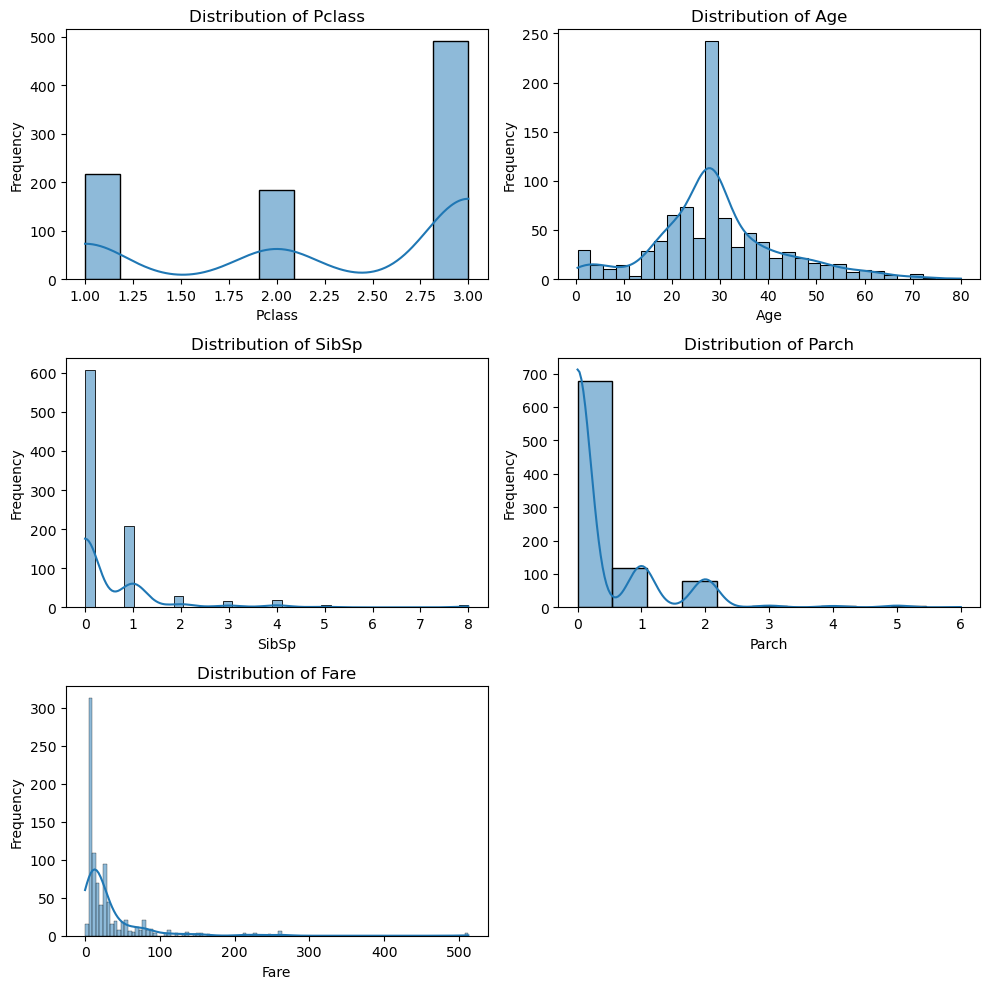

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Distribution plots for key features
key_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Adjust the figure to fit all plots
plt.figure(figsize=(10, 10))

# Plot distributions
for i, feature in enumerate(key_features, start=1):
    plt.subplot(3, 2, i)  # Adjust to 3 rows, 2 columns to fit all features
    sns.histplot(dftraining_cleaned[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


##### INSIGHT

- **Pclass:** The distribution is categorical, with a higher frequency in class 3, followed by class 1, and the least in class 2.

- **Age:** The distribution appears to follow a slightly right-skewed normal distribution, with most passengers being in their 20s and 30s.

- **SibSp (Number of Siblings/Spouses):** The majority of passengers have zero siblings or spouses onboard, with a sharp decline as the number increases.

- **Parch (Number of Parents/Children):** Most passengers have no parents or children onboard, similar to SibSp, with frequencies declining as the number increases.

- **Fare:** The distribution is heavily right-skewed, with most fares concentrated in the lower range, but with some outliers at higher fare values.

### Categorical Data Analysis

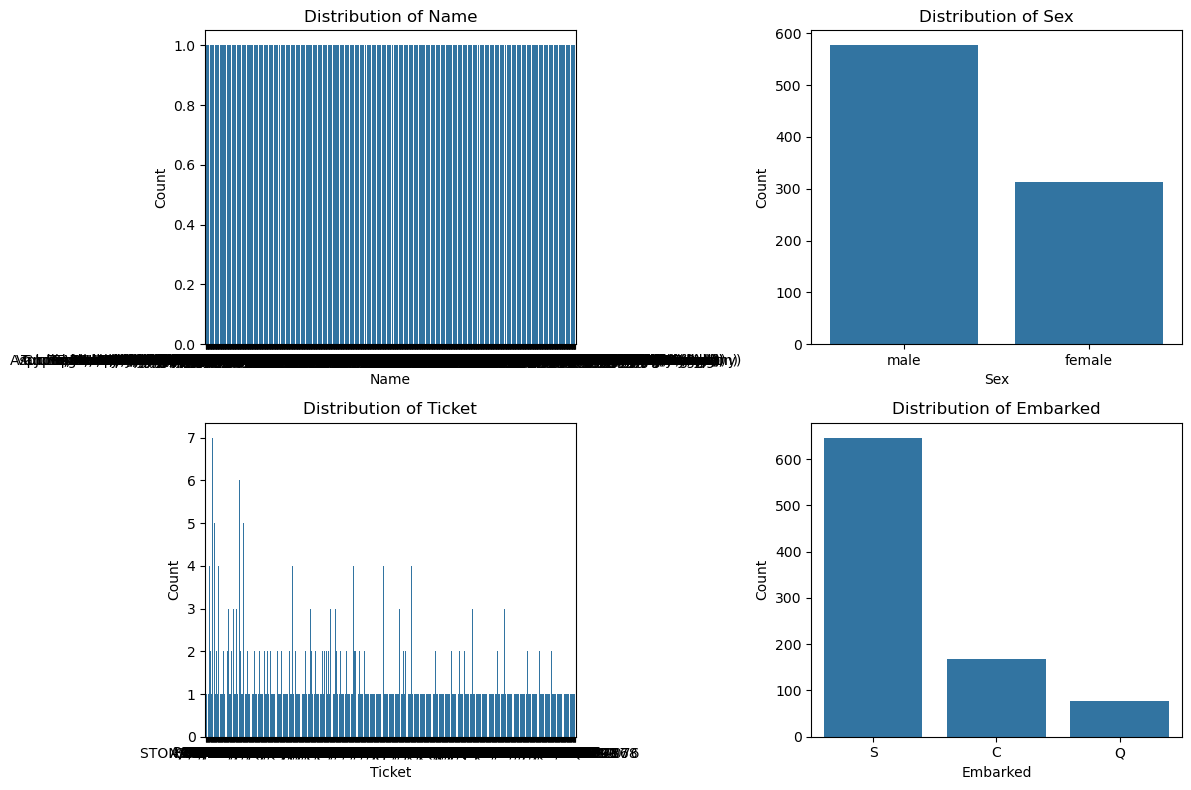

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Distribution plots for key categorical features
categorical_features = ['Name', 'Sex', 'Ticket', 'Embarked']

# Set up the figure with 2 rows and 2 columns
plt.figure(figsize=(12, 8))

# Plot bar plots for each categorical feature
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)  # 2 rows, 2 columns
    sns.countplot(x=feature, data=dftraining_cleaned)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


## Feature Engineering

- In this section I'm going to do convert categorical data to numerical
    - Title Extraction
    - One-Hot Encoding for Title, & Embarked Column
    - Convert Sex column to numerical
    - Create AgeGroup from Age Column and One_Hot Encoding for AgeGroup Column
    - Drop irrelevant columns ('PassengerId', 'Name', 'Ticket','Age')

### Title Extraction

-Titles like Mr, Mrs, or Miss can give clues about the passenger's gender, age, and social status, which may influence survival.

In [30]:
# Extract title from the Name column
dftraining_cleaned['Title'] = dftraining_cleaned['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Check unique titles
print(dftraining_cleaned['Title'].value_counts())


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


#### Group Rare Titles
- Some titles, like Countess, Capt, Lady, etc., appear very few times in the dataset. It’s a good idea to group these rare titles into a category called Rare.


In [32]:
# Group rare titles into a single category 'Rare'
dftraining_cleaned['Title'] = dftraining_cleaned['Title'].replace(['Dr', 'Rev', 'Mlle', 'Major', 'Col', 
                                                                    'Countess', 'Capt', 'Ms', 'Sir', 
                                                                    'Lady', 'Mme', 'Don', 'Jonkheer'], 'Rare')

# Check the updated value counts
print(dftraining_cleaned['Title'].value_counts())

# Optional: Check a few rows to see the mapped values
print(dftraining_cleaned[['Name', 'Title']].head())


Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64
                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr


### ENCODING


#### One-Hot Encoding for Title column

In [35]:
# Perform one-hot encoding for the Title column with numerical values
dftraining_cleaned = pd.get_dummies(dftraining_cleaned, columns=['Title'], drop_first=True, dtype=int)

# Check the updated DataFrame
print(dftraining_cleaned.head())




   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Title_Miss  Title_Mr  Title_Mrs  \
0      0         A/5 21171   7.2500        S           0         1          0   
1      0          PC 17599  71.2833        C           0         0          1   
2      0  STON/O2. 3101282   7.9250        S           1         0          0

In [36]:
# Verify the numerical one-hot encoded columns
dftraining_cleaned.filter(like='Title_').head()

,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0


#### Convert the Sex Column to Numerical Values

In [38]:
# Convert 'Sex' to numerical: male = 0, female = 1
dftraining_cleaned['Sex'] = dftraining_cleaned['Sex'].map({'male': 0, 'female': 1})

# Verify the changes
print(dftraining_cleaned[['Sex']].head())


   Sex
0    0
1    1
2    1
3    1
4    0


#### One-Hot Encoding for Embarked column

In [40]:
# Perform one-hot encoding for the 'Embarked' column with numerical values
dftraining_cleaned = pd.get_dummies(dftraining_cleaned, columns=['Embarked'], drop_first=True, dtype=int)

# Verify the changes
dftraining_cleaned.filter(like='Embarked_').head()


,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [41]:
#to check the information of columns
dftraining_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Title_Miss   891 non-null    int32  
 11  Title_Mr     891 non-null    int32  
 12  Title_Mrs    891 non-null    int32  
 13  Title_Rare   891 non-null    int32  
 14  Embarked_Q   891 non-null    int32  
 15  Embarked_S   891 non-null    int32  
dtypes: float64(2), int32(6), int64(6), object(2)
memory usage: 90.6+ KB


#### Create Age Groups

- Define logical bins for grouping ages, such as:

    - Child: 0–12 years
    - Teenager: 13–19 years
    - Young Adult: 20–35 years
    - Adult: 36–60 years
    - Senior: 60+ years

In [43]:
# Define age bins and labels
bins = [0, 12, 19, 35, 60, 80]  # Define bin edges
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']  # Define bin labels

# Create the AgeGroup column
dftraining_cleaned['AgeGroup'] = pd.cut(dftraining_cleaned['Age'], bins=bins, labels=labels)

# Verify the new column
dftraining_cleaned[['Age', 'AgeGroup']].head(5)

,Age,AgeGroup
0,22.0,Young Adult
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


#### One-Hot encoding for AgeGroup

- No Order Assumption: Unlike Pclass, age groups don’t have a strict numerical order, so one-hot encoding avoids incorrect assumptions.
- Model-Ready Data: Most machine learning algorithms require categorical data in numerical form.

In [45]:
# Perform one-hot encoding on AgeGroup
dftraining_cleaned = pd.get_dummies(dftraining_cleaned, columns=['AgeGroup'], drop_first=True, dtype=int)

# Verify the updated DataFrame
dftraining_cleaned.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_Q,Embarked_S,AgeGroup_Teenager,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1,0,0,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,0,1,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,0,1,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1,0,0,1,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,0,0,0,1,0,1,0,0


In [46]:
#to check the information of columns
dftraining_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PassengerId           891 non-null    int64  
 1   Survived              891 non-null    int64  
 2   Pclass                891 non-null    int64  
 3   Name                  891 non-null    object 
 4   Sex                   891 non-null    int64  
 5   Age                   891 non-null    float64
 6   SibSp                 891 non-null    int64  
 7   Parch                 891 non-null    int64  
 8   Ticket                891 non-null    object 
 9   Fare                  891 non-null    float64
 10  Title_Miss            891 non-null    int32  
 11  Title_Mr              891 non-null    int32  
 12  Title_Mrs             891 non-null    int32  
 13  Title_Rare            891 non-null    int32  
 14  Embarked_Q            891 non-null    int32  
 15  Embarked_S            8

### Drop other irrelevant columns

In [48]:
# Drop irrelevant columns
dftraining_cleaned.drop(columns=['PassengerId', 'Name', 'Ticket','Age'], inplace=True)

# Verify the updated DataFrame
print(dftraining_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Survived              891 non-null    int64  
 1   Pclass                891 non-null    int64  
 2   Sex                   891 non-null    int64  
 3   SibSp                 891 non-null    int64  
 4   Parch                 891 non-null    int64  
 5   Fare                  891 non-null    float64
 6   Title_Miss            891 non-null    int32  
 7   Title_Mr              891 non-null    int32  
 8   Title_Mrs             891 non-null    int32  
 9   Title_Rare            891 non-null    int32  
 10  Embarked_Q            891 non-null    int32  
 11  Embarked_S            891 non-null    int32  
 12  AgeGroup_Teenager     891 non-null    int32  
 13  AgeGroup_Young Adult  891 non-null    int32  
 14  AgeGroup_Adult        891 non-null    int32  
 15  AgeGroup_Senior       8

In [49]:
dftraining_cleaned.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_Q,Embarked_S,AgeGroup_Teenager,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
0,0,3,0,1,0,7.2500,0,1,0,0,0,1,0,1,0,0
1,1,1,1,1,0,71.2833,0,0,1,0,0,0,0,0,1,0
2,1,3,1,0,0,7.9250,1,0,0,0,0,1,0,1,0,0
3,1,1,1,1,0,53.1000,0,0,1,0,0,1,0,1,0,0
4,0,3,0,0,0,8.0500,0,1,0,0,0,1,0,1,0,0


## Exploratory Data Analysis Part2(EDA)

#### Check the Target Distribution (Survived)

- Understanding the distribution of the target variable is key to identifying class imbalance.

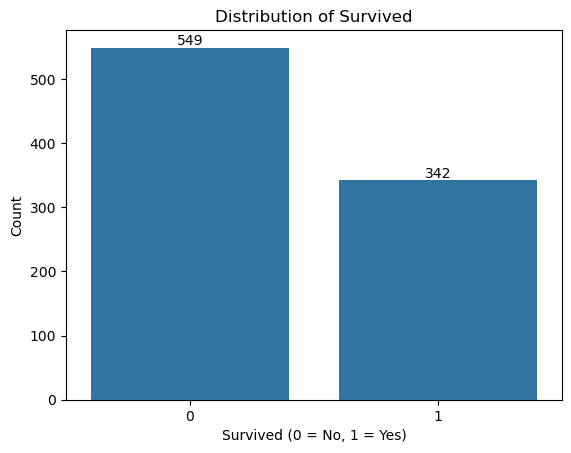

Survived
0    61.6%
1    38.4%
Name: proportion, dtype: object


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable with counts on bars
sns.countplot(x='Survived', data=dftraining_cleaned)
plt.title('Distribution of Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Display counts directly on the plot
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d')

plt.show()

# Calculate and display the class imbalance percentages
print(dftraining_cleaned['Survived'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')


#### Relationship Between Pclass (Passenger Class) and Survival rates


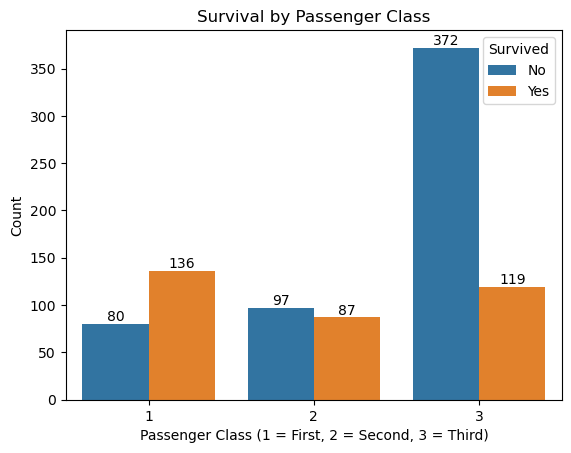

Pclass
1    62.96%
2    47.28%
3    24.24%
Name: Survived, dtype: object


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot survival rates by passenger class with counts on bars
sns.countplot(x='Pclass', hue='Survived', data=dftraining_cleaned)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class (1 = First, 2 = Second, 3 = Third)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Add counts directly on bars
for container in plt.gca().containers:
    plt.gca().bar_label(container)

plt.show()

# Calculate and display survival rates for each Pclass
print(dftraining_cleaned.groupby('Pclass')['Survived'].mean().mul(100).round(2).astype(str) + '%')


#### Insight- Survival Rates by Pclass

- Pclass 1 (First Class): 62.96%
    - Passengers in first class had the best survival chances, likely due to better access to lifeboats and priority during evacuation.

- Pclass 2 (Second Class): 47.28%
    - Second-class passengers had moderate survival chances, lower than first class but significantly better than third class.

- Pclass 3 (Third Class): 24.24%
    - Third-class passengers had the lowest survival rate, indicating their disadvantage during the disaster.
 
Even though Pclass 3 had more survivors in absolute numbers, its survival rate (24.24%) is significantly lower than that of Pclass 2 (47.28%). This is because the total number of passengers in third class was much higher, skewing the raw survivor count.

#### Relationship Between Sex and Survival rates

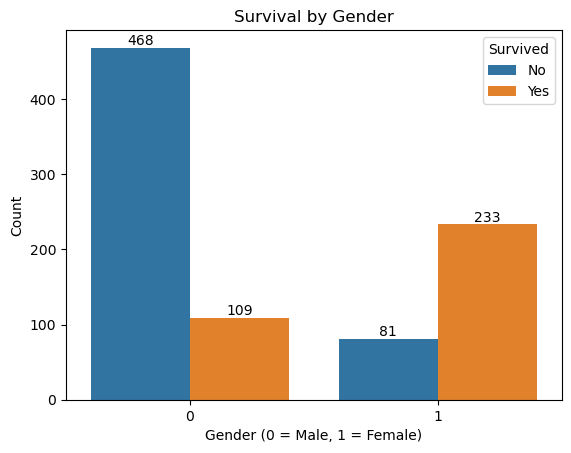

Sex
0    18.89%
1     74.2%
Name: Survived, dtype: object


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot survival rates by gender with counts on bars
sns.countplot(x='Sex', hue='Survived', data=dftraining_cleaned)
plt.title('Survival by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Add counts directly on bars
for container in plt.gca().containers:
    plt.gca().bar_label(container)

plt.show()

# Calculate and display survival rates by gender
print(dftraining_cleaned.groupby('Sex')['Survived'].mean().mul(100).round(2).astype(str) + '%')


#### Interpretation Survival rates by Gender

- "Women and Children First" Policy:
    - The significantly higher survival rate for females reflects the evacuation priority given to women during the Titanic disaster.

- Key Insight:

- **Gender** is a **strong predictor** of survival and should be an important feature in your model.

#### Relationship Between Age Group & Survival Rate

- As I have done One-hot Encoding for the AgeGroup column, now the process is not simple :/

In [60]:
# Calculate survival and non-survival counts for each age group
agegroup_counts = {
    'Teenager': dftraining_cleaned[dftraining_cleaned['AgeGroup_Teenager'] == 1]['Survived'].value_counts(),
    'Young Adult': dftraining_cleaned[dftraining_cleaned['AgeGroup_Young Adult'] == 1]['Survived'].value_counts(),
    'Adult': dftraining_cleaned[dftraining_cleaned['AgeGroup_Adult'] == 1]['Survived'].value_counts(),
    'Senior': dftraining_cleaned[dftraining_cleaned['AgeGroup_Senior'] == 1]['Survived'].value_counts(),
}

# Convert to DataFrame for visualization
agegroup_survival_df = pd.DataFrame(agegroup_counts).T
agegroup_survival_df.columns = ['Not Survived', 'Survived']

# Print the DataFrame for verification
print(agegroup_survival_df)


             Not Survived  Survived
Teenager               56        39
Young Adult           330       180
Adult                 117        78
Senior                 17         5


In [61]:
# Veryfying the calculated result
not_survived = {
    'Teenager': len(dftraining_cleaned[(dftraining_cleaned['AgeGroup_Teenager'] == 1) & (dftraining_cleaned['Survived'] == 0)]),
    'Young Adult': len(dftraining_cleaned[(dftraining_cleaned['AgeGroup_Young Adult'] == 1) & (dftraining_cleaned['Survived'] == 0)]),
    'Adult': len(dftraining_cleaned[(dftraining_cleaned['AgeGroup_Adult'] == 1) & (dftraining_cleaned['Survived'] == 0)]),
    'Senior': len(dftraining_cleaned[(dftraining_cleaned['AgeGroup_Senior'] == 1) & (dftraining_cleaned['Survived'] == 0)])
}
print(not_survived)


{'Teenager': 56, 'Young Adult': 330, 'Adult': 117, 'Senior': 17}


In [62]:
# Veryfying the calculated result
survived = {
    'Teenager': len(dftraining_cleaned[(dftraining_cleaned['AgeGroup_Teenager'] == 1) & (dftraining_cleaned['Survived'] == 1)]),
    'Young Adult': len(dftraining_cleaned[(dftraining_cleaned['AgeGroup_Young Adult'] == 1) & (dftraining_cleaned['Survived'] == 1)]),
    'Adult': len(dftraining_cleaned[(dftraining_cleaned['AgeGroup_Adult'] == 1) & (dftraining_cleaned['Survived'] == 1)]),
    'Senior': len(dftraining_cleaned[(dftraining_cleaned['AgeGroup_Senior'] == 1) & (dftraining_cleaned['Survived'] == 1)])
}
print(survived)

{'Teenager': 39, 'Young Adult': 180, 'Adult': 78, 'Senior': 5}


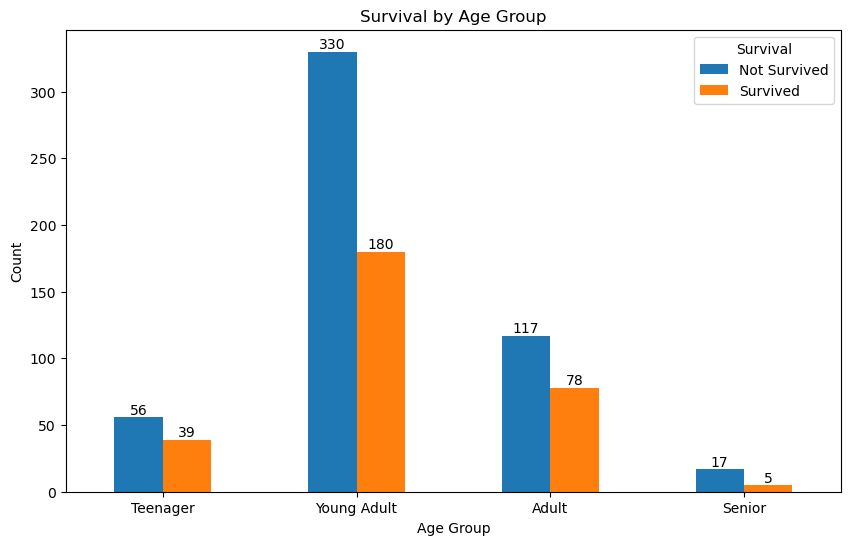

Percentages of Survival and Non-Survival by Age Group:
             Not Survived  Survived
Teenager            58.95     41.05
Young Adult         64.71     35.29
Adult               60.00     40.00
Senior              77.27     22.73


In [63]:
# Plot clustered column chart
ax = agegroup_survival_df.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survival')

# Add counts on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')  # Add labels at the edges of bars

plt.show()

# Calculate total counts for each age group
total_counts = agegroup_survival_df.sum(axis=1)

# Calculate percentages for survival and non-survival
percentages = agegroup_survival_df.div(total_counts, axis=0).mul(100).round(2)

# Print the percentages
print("Percentages of Survival and Non-Survival by Age Group:")
print(percentages)


#### Key Insights

- Teenagers:
        A relatively balanced number of survivors (39) and non-survivors (56).
        Teenagers had a moderate survival chance compared to adults and seniors, likely due to their priority during evacuation.
  
- Young Adults:
        The largest group in the dataset.
        A significant number survived (180), but the majority did not (330), likely because many young adults were in Pclass 3, which had the lowest survival rates.

- Adults:
        Adults had fewer survivors (78) than non-survivors (117).
        Their survival was better than seniors but worse than teenagers, reflecting less priority compared to children and possibly more challenges in evacuation.

- Seniors:
    The least number of passengers in this group.
    Very few survivors (5), with the majority not surviving (17), reflecting mobility issues and lower priority during evacuation.

- General Trends
  
    - Children and Teenagers had higher survival chances due to the "Women and Children First" policy.
    - Young Adults and Adults had mixed outcomes, with survival likely influenced by class (Pclass) and gender.
    - Seniors had the lowest survival rate, as expected, due to physical limitations and evacuation priorities.
      
- Actionable Insights
  
    - AgeGroup is a significant feature for predicting survival.
    - It might also interact with other features like Sex and Pclass. For example:
    - Were younger females more likely to survive than older males?

### Relationship Between Sibsp & Survival Rate

**SibSp**  	**Count**	**Interpretation**

- 0	       608	   Most passengers were traveling alone (no siblings or spouses).
- 1	       209	   A significant number traveled with 1 sibling or spouse.
- 2	       28	   Few passengers had 2 siblings or spouses aboard.
- 3	       16	   Very small group with 3 siblings or spouses.
- 4	       18	   Similar to 3, small group with 4 siblings or spouses.
- 5	       5	   Very rare group with 5 siblings or spouses.
- 8	       7	   Very rare group with 8 siblings or spouses.

**Insights**

Most Common Group:

Passengers traveling alone (SibSp = 0) make up the majority (608 passengers).
Passengers with 1 sibling or spouse (SibSp = 1) are the second-largest group (209 passengers).

Rare Groups:

Passengers with 3, 4, 5, or 8 siblings/spouses are rare and may have distinct survival trends.


In [66]:
# Find unique values and their counts in SibSp
unique_sibsp = dftraining_cleaned['SibSp'].value_counts().sort_index()

# Print the unique values and their counts
print("Unique values in SibSp and their counts:")
print(unique_sibsp)


Unique values in SibSp and their counts:
SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64


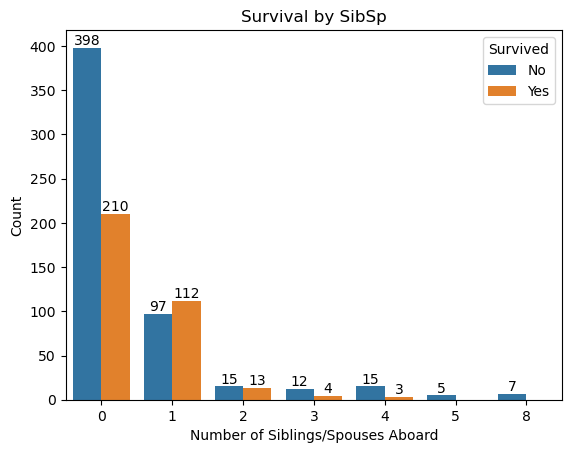

       Not Survived (%)  Survived (%)
SibSp                                
0                 65.46         34.54
1                 46.41         53.59
2                 53.57         46.43
3                 75.00         25.00
4                 83.33         16.67
5                100.00           NaN
8                100.00           NaN


In [67]:
# Bar chart for survival counts by SibSp
sns.countplot(x='SibSp', hue='Survived', data=dftraining_cleaned)
plt.title('Survival by SibSp')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Add counts on the bars
for container in plt.gca().containers:
    plt.bar_label(container)

plt.show()

# Calculate survival percentages for each SibSp value
sibsp_survival = dftraining_cleaned.groupby('SibSp')['Survived'].value_counts(normalize=True).unstack() * 100

# Rename columns for better clarity
sibsp_survival.columns = ['Not Survived (%)', 'Survived (%)']

# Round to two decimal points
sibsp_survival = sibsp_survival.round(2)

# Display the survival percentages
print(sibsp_survival)

#### Key Insights

- Small Family Sizes Increase Survival Chances:
- Passengers with 1 sibling or spouse had the highest survival rate (53.59%).
- Traveling alone also had a decent survival rate (34.54%), although lower than small families.
- Larger Families Decrease Survival Chances:

- Survival rates dropped significantly as family size increased. For example:
- SibSp = 3: Only 25.00% survived.
- SibSp ≥ 5: No passengers survived.

- Challenges for Large Families:
- Larger family groups likely faced difficulties staying together during evacuation.
- Resource limitations (lifeboat space) might have prioritized smaller families or individuals.

### Relationship Between Parch (Parents/Children Aboard) & Survival Rate

In [70]:
# Find unique values and their counts in Parch
unique_parch = dftraining_cleaned['Parch'].value_counts().sort_index()

# Print the unique values and their counts
print("Unique values in Parch and their counts:")
print(unique_parch)

# Calculate survival percentages for each Parch value
parch_survival = dftraining_cleaned.groupby('Parch')['Survived'].value_counts(normalize=True).unstack() * 100

# Rename columns for better clarity
parch_survival.columns = ['Not Survived (%)', 'Survived (%)']

# Round to two decimal points
parch_survival = parch_survival.round(2)

# Display the survival percentages
print(parch_survival)



Unique values in Parch and their counts:
Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64
       Not Survived (%)  Survived (%)
Parch                                
0                 65.63         34.37
1                 44.92         55.08
2                 50.00         50.00
3                 40.00         60.00
4                100.00           NaN
5                 80.00         20.00
6                100.00           NaN


- Parch	Not Survived (%)	Survived (%)	Key Observations
- 0	65.63%	34.37%	Passengers traveling alone had low survival rates.
- 1	44.92%	55.08%	**Traveling with 1 parent or child greatly improved survival chances.**
- 2	50.00%	50.00%	**Traveling with 2 parents/children maintained balanced survival chances.**
- 3	40.00%	60.00%	**Small group with 3 parents/children had the highest survival rate (60%)**.
- 4	100.00%	NaN	All passengers with 4 parents/children perished.
- 5	80.00%	20.00%	Survival rates dropped significantly with 5 parents/children.
- 6	100.00%	NaN	The lone passenger with 6 parents/children did not survive.


##### Key Insights

- Traveling Alone is Risky:
    -Passengers without parents/children (Parch = 0) had a survival rate of only 34.37%.

- Small Family Groups Increase Survival Chances:
    - Traveling with 1–3 parents/children significantly boosted survival chances, peaking at 60.00% for Parch = 3.

- Larger Families Decrease Survival Chances:
    - Passengers with 4–6 parents/children had extremely poor outcomes, with survival rates dropping to 0% for Parch = 4 and Parch = 6.

- Possible Reasons:
    - Larger families may have struggled to stay together during evacuation.
    - Lifeboat limitations likely prioritized smaller groups or individuals.

### Relationship Between Fare and Survival Rate


Summary Statistics for Fare:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


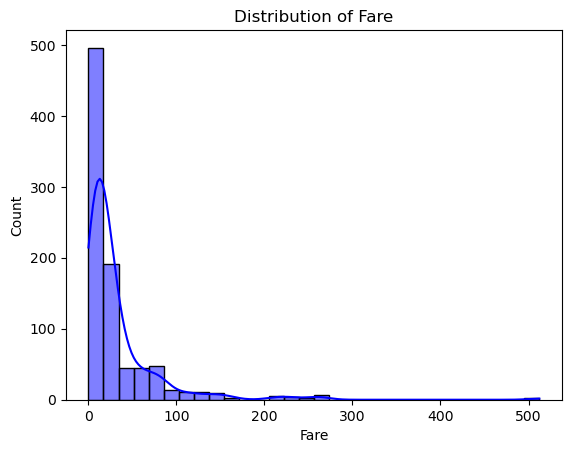

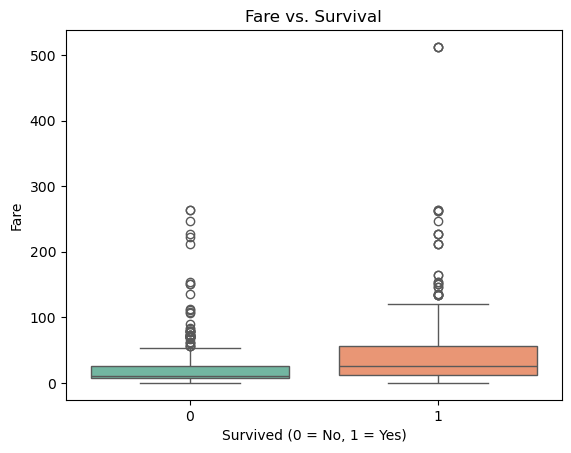

In [73]:
# Summary statistics for Fare
fare_summary = dftraining_cleaned['Fare'].describe()
print("Summary Statistics for Fare:")
print(fare_summary)

import warnings

# Suppress specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Re-plot the histogram
sns.histplot(dftraining_cleaned['Fare'], bins=30, kde=True, color='blue')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# Box plot for Fare and Survival
sns.boxplot(x='Survived', y='Fare', data=dftraining_cleaned, palette='Set2')
plt.title('Fare vs. Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()


##### Insights

- Wide Range of Fares:
    - Fares range from 0.00 to 512.33, reflecting a large socio-economic divide among passengers.
    - The mean fare (32.20) is much higher than the median (14.45), indicating a skewed distribution (a few passengers paid very high fares).

- Wealth and Survival:
    - Passengers with higher fares (likely in first class) may have had better survival chances due to priority in lifeboats.


### Combined Observations from EDA

**Key Predictors:**

    - Gender, Pclass, and AgeGroup are strong predictors of survival.

    - Passengers with small family sizes (SibSp and Parch) and higher fares also had better chances.

**Highest Survival Chances:**

- Females in first class and children/teenagers with small families had the highest survival probabilities.

**Lowest Survival Chances:**

- Males in third class, young adults traveling alone, and large families had the lowest survival rates.

### Correlation Heatmap

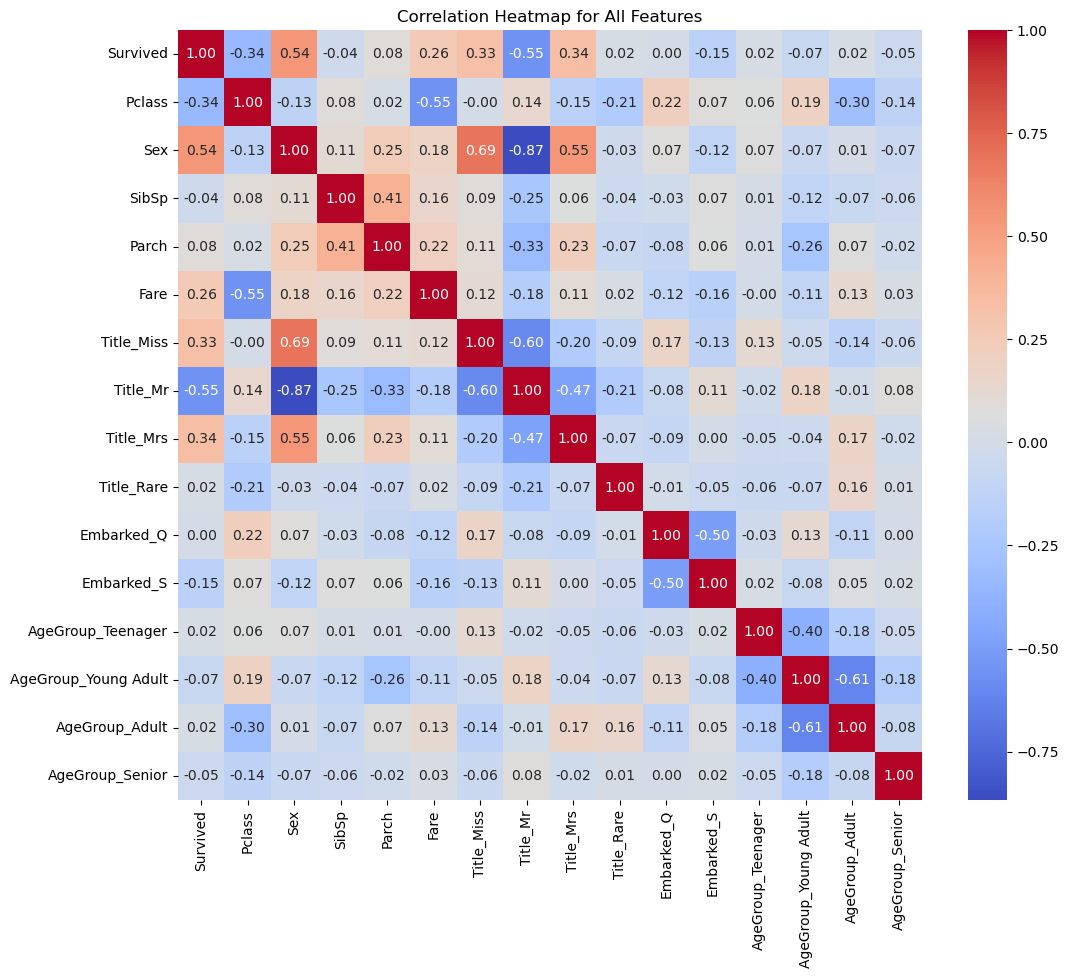

In [77]:
# Calculate the correlation matrix for all features
correlation_matrix = dftraining_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap for All Features')
plt.show()

#### Key Observations:

**Survived (Target Variable):**

- **Positive Correlation:**
  
    - Sex (0.54): Strong correlation indicating females were more likely to survive.
    - Fare (0.26): Passengers paying higher fares had higher survival rates.
    - Title_Miss (0.33) and Title_Mrs (0.34): Reflects the strong survival chances of females.

- **Negative Correlation:**
    - Pclass (-0.34): Passengers in lower classes (3rd class) were less likely to survive.
    - Title_Mr (-0.55): Indicates males were less likely to survive.

- **Other Feature Relationships:**

    - Fare and Pclass (-0.55):
    - Strong negative correlation; higher classes (1st class) had significantly higher fares.
    - Sex and Title_Mr (-0.87):
    - Male passengers strongly align with the title "Mr."
    - Parch and SibSp (0.41):
    - Indicates families traveling together.

**Weak Correlations:**

    - Features like Embarked_Q, Embarked_S, and AgeGroup_Teenager have little to no correlation with survival.
    - These might not contribute significantly to predictive modeling.

##### Actionable Insights:

**Strong Predictors for Survival:**

Sex, Fare, Pclass, and titles like Title_Miss and Title_Mr.

**Features with Weak Relationships:**
Consider excluding or transforming weakly correlated features (e.g., Embarked_Q, Embarked_S, some age group encodings) if they don’t improve model 

## Model Building - With Selected Features

In [80]:
# Import required libraries for machine learning models and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [81]:
# Define the target (y) and features (X)
selected_features = ['Sex', 'Fare', 'Pclass', 'Title_Miss', 'Title_Mr', 'Title_Mrs']
X = dftraining_cleaned[selected_features]  # Features
y = dftraining_cleaned['Survived']  # Target


In [82]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [83]:
# Check class distribution in the entire dataset
print("Class distribution in the full dataset:")
print((y.value_counts(normalize=True) * 100).round(2))

# Check class distribution in the training set
print("\nClass distribution in the training set:")
print((y_train.value_counts(normalize=True) * 100).round(2))

# Check class distribution in the test set
print("\nClass distribution in the test set:")
print((y_test.value_counts(normalize=True) * 100).round(2))

Class distribution in the full dataset:
Survived
0    61.62
1    38.38
Name: proportion, dtype: float64

Class distribution in the training set:
Survived
0    61.66
1    38.34
Name: proportion, dtype: float64

Class distribution in the test set:
Survived
0    61.45
1    38.55
Name: proportion, dtype: float64


### Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [86]:
# Make predictions on the test set
y_pred = logreg.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       110
           1       0.72      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



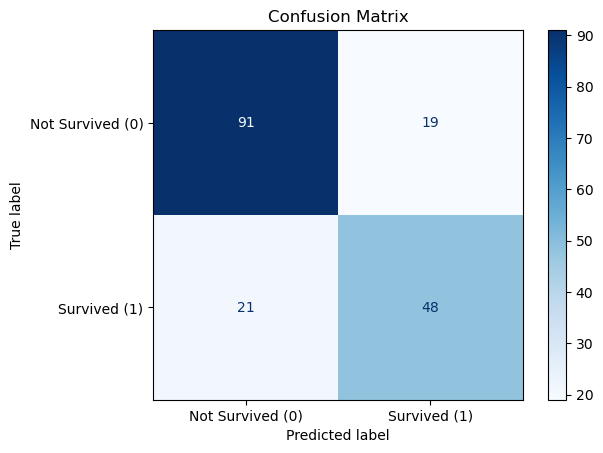

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Survived (0)", "Survived (1)"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

### Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       110
           1       0.70      0.72      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Confusion Matrix:
[[89 21]
 [19 50]]


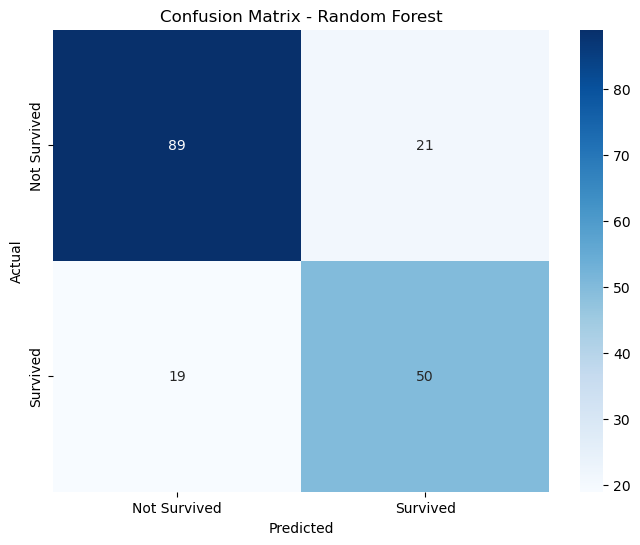

In [89]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # You can tune `n_estimators` and other hyperparameters

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred = random_forest.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


I have considered all the including:

**Dataset:**
Have applied Random Oversampling and also experimented with SMOTE.

**Feature Selection:**
You’ve tested models with selected features and with all features.

**Models:**
Logistic Regression and Random Forest were used.
Hyperparameter tuning was applied to Logistic Regression with all features and Random Oversampling.

**Performance Metrics:**
I focused on the key metrics you provided: accuracy, precision, recall, and F1-score for Class 1 (survivors).
Confusion matrices were analyzed to assess false positives and false negatives.

**Preferences:**
Aim for a model that performs well in predicting survivors (Class 1) with balanced metrics.
I prioritize accuracy as it's likely the competition's evaluation metric but also want good precision and recall for survivors.

## Model Building - With All Features

- Because this is the best approch with compared to other results

In [144]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
import matplotlib.pyplot as plt

In [148]:
#Step 1: Define Features and Target
# -----------------------------------------------

# Assuming 'dftraining_cleaned' is the preprocessed dataset
# X contains all features except the target column 'Survived'
X = dftraining_cleaned.drop(columns=['Survived'])  # Features
y = dftraining_cleaned['Survived']  # Target variable


In [150]:
#Step 2: Train-Test Split
# -----------------------------------------------

# Split the data into training and testing sets with stratification to balance class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [152]:
# Check class distribution in the training set before oversampling
print("Class Distribution Before Oversampling:")
print(Counter(y_train))

Class Distribution Before Oversampling:
Counter({0: 439, 1: 273})


In [154]:
#Step 3: Apply Random Oversampling
# -----------------------------------------------

# Initialize Random Oversampler
ros = RandomOverSampler(random_state=42)

In [156]:
# Apply oversampling to balance the training set
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [158]:
# Check class distribution in the training set after oversampling
print("Class Distribution After Oversampling:")
print(Counter(y_train_ros))

Class Distribution After Oversampling:
Counter({1: 439, 0: 439})


In [160]:
#Step 4: Train Logistic Regression Without Tuning
# -----------------------------------------------

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the Logistic Regression model on the oversampled data
logreg.fit(X_train_ros, y_train_ros)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)


Classification Report for Logistic Regression (Without Tuning):
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.76      0.77      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



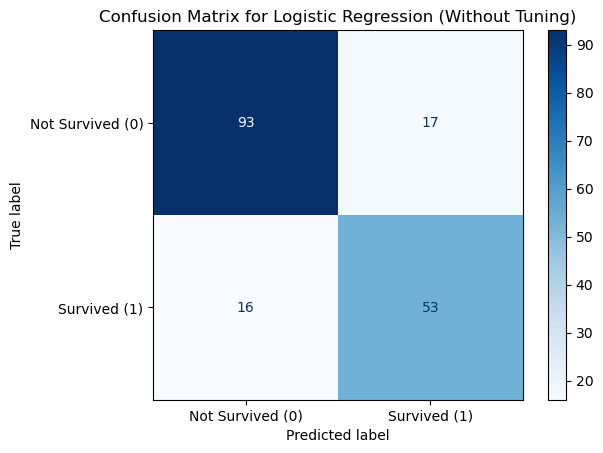

In [162]:
# Evaluate the model
print("Classification Report for Logistic Regression (Without Tuning):")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_logreg, display_labels=["Not Survived (0)", "Survived (1)"])
disp_logreg.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Logistic Regression (Without Tuning)")
plt.show()

In [164]:
#Step 5: Hyperparameter Tuning with GridSearchCV
# -----------------------------------------------

# Define the hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],          # Regularization strength (smaller = stronger regularization)
    'solver': ['liblinear', 'lbfgs'],      # Optimization algorithms
    'class_weight': [None, 'balanced']     # Class weighting (to handle class imbalance)
}

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Set up GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Perform the grid search on the oversampled training data
grid_search.fit(X_train_ros, y_train_ros)

# Get the best parameters from GridSearchCV
print("Best Parameters from Grid Search:", grid_search.best_params_)

# Train Logistic Regression with the best parameters
best_logreg = grid_search.best_estimator_
best_logreg.fit(X_train_ros, y_train_ros)

Best Parameters from Grid Search: {'C': 100, 'class_weight': None, 'solver': 'lbfgs'}


LogisticRegression(C=100, max_iter=1000, random_state=42)

Classification Report for Tuned Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       110
           1       0.78      0.84      0.81        69

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.84       179
weighted avg       0.85      0.85      0.85       179

Confusion Matrix for Tuned Logistic Regression:
[[94 16]
 [11 58]]


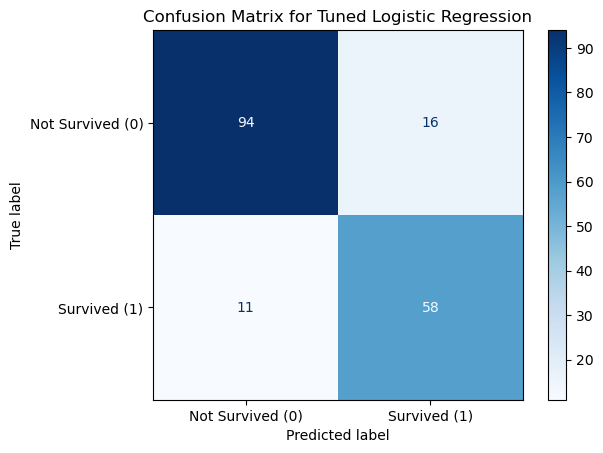

In [168]:
#Step 6: Evaluate the Tuned Logistic Regression
# -----------------------------------------------

# Make predictions on the test set using the tuned model
y_pred_best = best_logreg.predict(X_test)

# Evaluate the tuned model
print("Classification Report for Tuned Logistic Regression:")
print(classification_report(y_test, y_pred_best))

# Evaluating the model with classification report and confusion matrix
print("Confusion Matrix for Tuned Logistic Regression:")
cm = confusion_matrix(y_test, y_pred_best)
print(cm)

# Confusion Matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_best, display_labels=["Not Survived (0)", "Survived (1)"])
disp_best.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Tuned Logistic Regression")
plt.show()

## Save Trained Model

- To use the trained model in a new notebook, save it to a file.

In [177]:
import joblib

# Save the model
joblib.dump(best_logreg, 'tuned_logistic_regression_model.pkl')

print("Model saved to 'tuned_logistic_regression_model.pkl'")

# To load the model later
loaded_model = joblib.load('tuned_logistic_regression_model.pkl')


Model saved to 'tuned_logistic_regression_model.pkl'


In [179]:
import joblib

# Save the median age to a file
joblib.dump(median_age, 'median_age.pkl')
print("Median age saved successfully.")


Median age saved successfully.


### Save the Column Names from Training Notebook

In [186]:
import joblib

# Save the column names of the cleaned training dataset

training_columns = dftraining_cleaned.columns
joblib.dump(list(training_columns), 'training_columns.pkl')
print("Training column names saved successfully.")



Training column names saved successfully.
